# 數據科學概論 Final Project

## Mice Protein Clustering

0416235 劉昱劭

* 1. Fill Missing Value
* 2. Encode target
* 3. Dimension Reduction to 2-dim 
* 4. Clustering 
    * 4-1. without k (未知群數)
    * 4-2. with k (已知群數)
* 5. Dimension Reduction to 3-dim
* 6. PCA 3-dim data clustering 
    * 6-1. without k 
    * 6-2. with k
* 7. LDA 3-dim data clustering
    * 7-1. without k 
    * 7-2. with k 
<a href="#Classification-(Hw7)">Hw7</a>

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
protein = pd.read_csv("nuclear.csv", index_col=0)

In [3]:
#protein.groupby(['class']).describe(percentiles=[]).transpose().head()

In [4]:
proteinData = [protein.iloc[:,0:18], protein.iloc[:,11:21], protein.iloc[:,21:31], protein.iloc[:,31:41], 
               protein.iloc[:,41:51], protein.iloc[:,51:61], protein.iloc[:,61:71], protein.iloc[:,71:77]]
#print(proteinData)

## 1. Fill Missing Value 
* with average value of each group

In [5]:
# Fill Missing Value with avg value of group
na_cols = protein.columns[protein.isna().any()].tolist()
print(na_cols)
fill_protein = protein.copy()
for n in na_cols:
    fill_protein[n] = fill_protein.groupby(['class'], sort=False)[n].apply(lambda x: x.fillna(x.mean()))
print(fill_protein.columns[fill_protein.isna().any()].tolist())

['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']
[]


## 2. Encode Target

In [496]:
target_encoded_protein = fill_protein.copy()
target_encoded_protein['target'] = target_encoded_protein['class'].astype('category').cat.codes

In [556]:
target_encoded_protein.groupby(['class']).head(1).iloc[:, -10:]

SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N Genotype  \
MouseID                                                               
309_1    0.427099   0.114783  0.131790  0.128186  1.675652  Control   
294_1    0.464092   0.185664  0.183012  0.168740  1.027627  Control   
3477_1   0.400048   0.154416  0.135307  0.172007  1.399615  Control   
3422_1   0.418097   0.136876  0.175802  0.179059  0.959882  Control   
3414_1   0.400078   0.112587  0.107095  0.123739  1.829242   Ts65Dn   
293_1    0.489383   0.400228  0.139862  0.284145  1.198272   Ts65Dn   
18899_1  0.397663   0.155484  0.158174  0.187052  1.357802   Ts65Dn   
3421_1   0.400070   0.205017  0.174371  0.204785  1.322558   Ts65Dn   

         Treatment Behavior   class  target  
MouseID                                      
309_1    Memantine      C/S  c-CS-m       0  
294_1    Memantine      S/C  c-SC-m       2  
3477_1      Saline      C/S  c-CS-s       1  
3422_1      Saline      S/C  c-SC-s       3  
3414_1   Memantine      C/S  t-CS-m       4  
293_1    Memantine      S/C  t-SC-m       6  
18899_1     Saline      C/S  t-CS-s       5  
3421_1      Saline      S/C  t-SC-s       7

In [502]:
ground_truth = target_encoded_protein.iloc[:, -1].values

## 3. Dimensionality Reduction to 2 dim
* Reduce dimensionality to 2-dim by PCA & LDA

/home/ailurus/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


explained variance ratio (first two components): [0.415082   0.29247054]


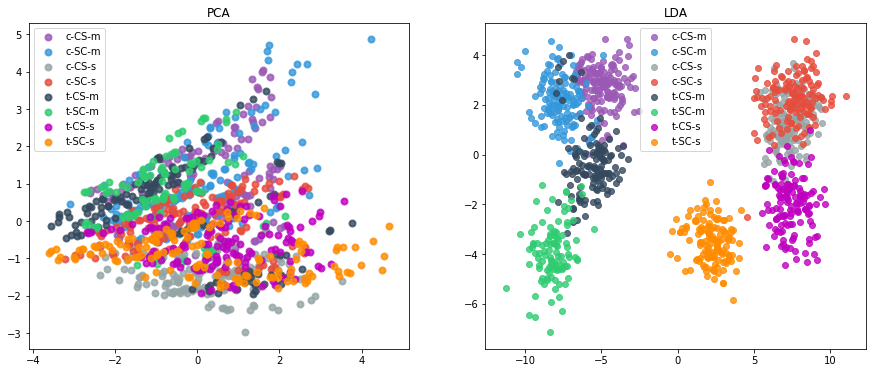

In [525]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.colors as mcolors

X = target_encoded_protein.iloc[:, :77].values
y = ground_truth.copy()
target_names = target_encoded_protein['class'].unique()

pca = PCA(n_components=2)
X_PCA = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_LDA = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
colors = flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", 'm', 'darkorange'] 
#colors = list(mcolors.cnames)
lw = 2

for color, i, target_name in zip(colors, range(0, len(target_names)), target_names):
    plt.scatter(X_PCA[y == i, 0], X_PCA[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.subplot(1,2,2)
for color, i, target_name in zip(colors, range(0, len(target_names)), target_names):
    plt.scatter(X_LDA[y == i, 0], X_LDA[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')

plt.show()

## 4. Clustering
* 4-1 Clustering Method without k
* 4-2 Clustering Method with given k

In [424]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, completeness_score, homogeneity_score
rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)


### 4-1 Clustering Method without k
* 未知群數的分群

Origin (77 dim)


AffinityPropagation     MeanShift        DBSCAN
v_measure                0.539819  2.140593e-16  2.140593e-16
completeness             0.398727  1.000000e+00  1.000000e+00
homogeneity              0.835448  1.070297e-16  1.070297e-16
rand_score               0.118945  0.000000e+00  0.000000e+00

--------------------------------------------------
PCA (2 dim)


AffinityPropagation     MeanShift    DBSCAN
v_measure                0.146638  2.140593e-16  0.012377
completeness             0.211996  1.000000e+00  0.104793
homogeneity              0.112083  1.070297e-16  0.006577
rand_score               0.093971  0.000000e+00  0.000137

--------------------------------------------------
LDA (2 dim)


AffinityPropagation  MeanShift    DBSCAN
v_measure                0.706204   0.500664  0.499559
completeness             0.890059   1.000000  0.984829
homogeneity              0.585302   0.333924  0.334657
rand_score               0.507490   0.250763  0.250750

--------------------------------------------------


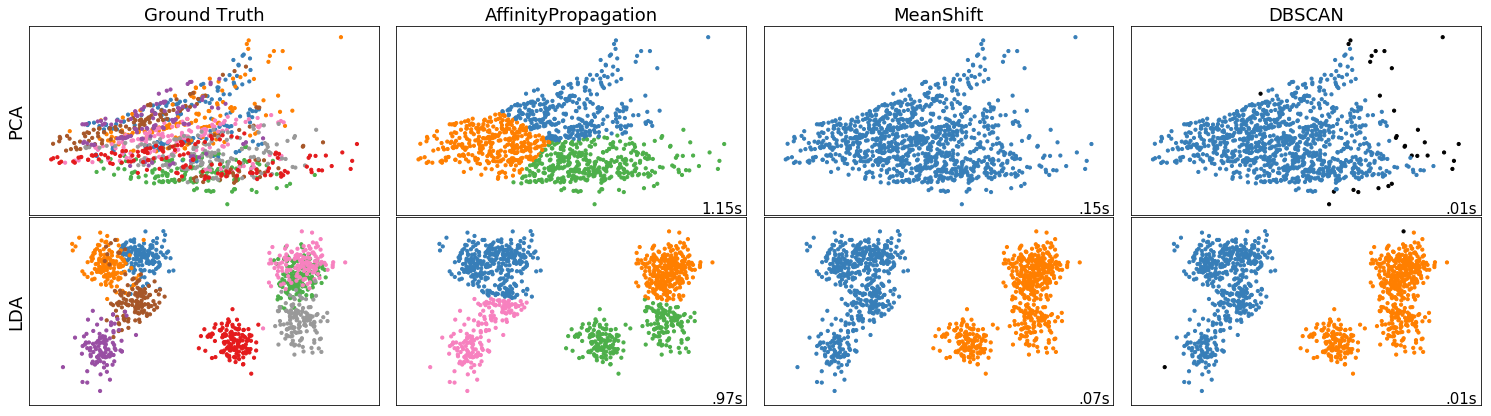

In [557]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 11))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 8}

dataName = [ 'Origin', 'PCA', 'LDA']
datasets = [ ([fill_protein.iloc[:, :77].values, ground_truth], {}),
             ([X_PCA, ground_truth], {}),
             ([X_LDA, ground_truth], {})
           ]

rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])

    clustering_algorithms = (
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('DBSCAN', dbscan)
    )
    
    """ Only plot scatterplot for 2 dim data """
    dimension = X.shape[1]
    if dimension < 3:
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(ground_truth) + 1))))

        plt.subplot(len(datasets)+1, len(clustering_algorithms)+1, plot_num)
        if i_dataset == 1:
            plt.title('Ground Truth', size=18)

        plt.ylabel(dataName[i_dataset], fontsize=18)
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[ground_truth])
        xLimit = X[:,0].min()-0.4, X[:,0].max()+0.4
        yLimit = X[:,1].min()-0.4, X[:,1].max()+0.4
        plt.xlim(xLimit)
        plt.ylim(yLimit)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
    
    for i_algo, (name, algorithm) in enumerate(clustering_algorithms):
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

            
        dimension = X.shape[1]
        if dimension <= 3:
            plt.subplot(len(datasets)+1, len(clustering_algorithms)+1, plot_num)
            if i_dataset == 1:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            # add black color for outliers (if any)

            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            xLimit = X[:,0].min()-0.4, X[:,0].max()+0.4
            yLimit = X[:,1].min()-0.4, X[:,1].max()+0.4
            plt.xlim(xLimit)
            plt.ylim(yLimit)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1
        
        clusterResult.loc[name] = v_measure_score(ground_truth, y_pred), \
                        completeness_score(ground_truth, y_pred), homogeneity_score(ground_truth, y_pred), \
                        adjusted_rand_score(ground_truth, y_pred)
    print(dataName[i_dataset], '(%d dim)'  % dimension )
    display(clusterResult.transpose())
    print('-'*50)

if dimension <= 3:
    plt.show()

> 因為資料過於靠近，難以分出 8 群

### 4-2 Clustering method with given k
* 給定群數 k 的分群

Origin (77 dim)


KMeans  SpectralClustering      Ward  AgglomerativeClustering  \
v_measure     0.296674            0.451411  0.322522                 0.030085   
completeness  0.305711            0.539897  0.333081                 0.297964   
homogeneity   0.288156            0.387846  0.312612                 0.015842   
rand_score    0.158904            0.231627  0.168617                 0.000167   

                 Birch  GaussianMixture  
v_measure     0.264992         0.236160  
completeness  0.274304         0.239658  
homogeneity   0.256291         0.232763  
rand_score    0.125826         0.120439

--------------------------------------------------
PCA (2 dim)


KMeans  SpectralClustering      Ward  AgglomerativeClustering  \
v_measure     0.195880            0.229053  0.217847                 0.025626   
completeness  0.198558            0.231597  0.219346                 0.281953   
homogeneity   0.193272            0.226565  0.216369                 0.013423   
rand_score    0.098134            0.118402  0.114664                 0.000229   

                 Birch  GaussianMixture  
v_measure     0.169129         0.229301  
completeness  0.190084         0.232470  
homogeneity   0.152335         0.226217  
rand_score    0.089715         0.130888

--------------------------------------------------
LDA (2 dim)


KMeans  SpectralClustering      Ward  AgglomerativeClustering  \
v_measure     0.734242            0.739274  0.725042                 0.499330   
completeness  0.735256            0.742621  0.728754                 0.927173   
homogeneity   0.733230            0.735958  0.721369                 0.341668   
rand_score    0.622702            0.596264  0.563750                 0.250009   

                 Birch  GaussianMixture  
v_measure     0.781119         0.806467  
completeness  0.796858         0.821941  
homogeneity   0.765991         0.791564  
rand_score    0.653456         0.705088

--------------------------------------------------


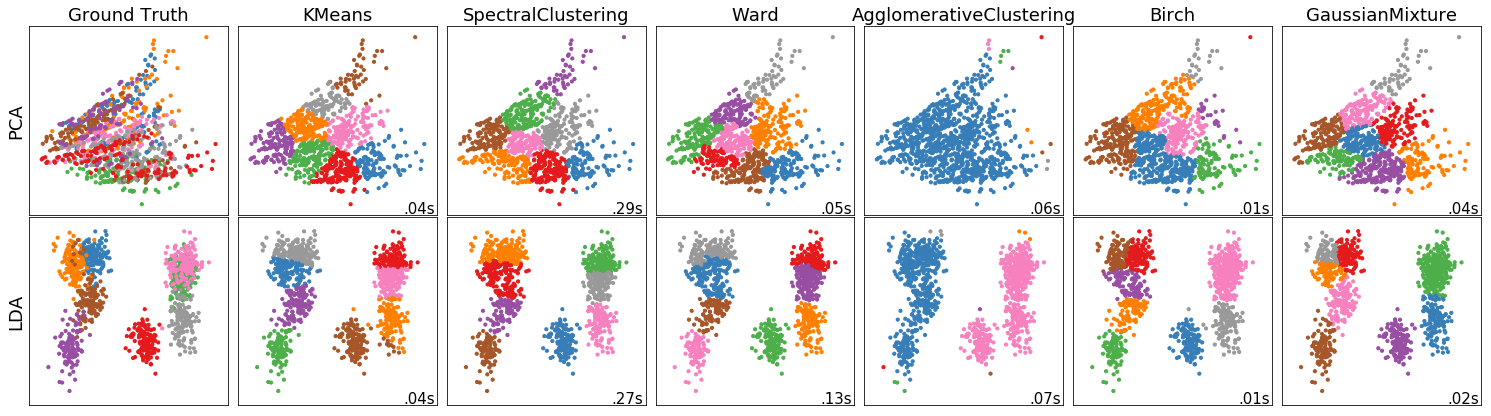

In [559]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 11))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 8}

dataName = [ 'Origin', 'PCA', 'LDA']
datasets = [ ([fill_protein.iloc[:, :77].values, ground_truth], {}),
             ([X_PCA, ground_truth], {}),
             ([X_LDA, ground_truth], {})
           ]

rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)


for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('KMeans', two_means),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )
    
    """ Only plot scatterplot for 2 dim data """
    dimension = X.shape[1]
    if dimension < 3:
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(ground_truth) + 1))))

        plt.subplot(len(datasets)+1, len(clustering_algorithms)+1, plot_num)
        if i_dataset == 1:
            plt.title('Ground Truth', size=18)

        plt.ylabel(dataName[i_dataset], fontsize=18)
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[ground_truth])
        xLimit = X[:,0].min()-0.4, X[:,0].max()+0.4
        yLimit = X[:,1].min()-0.4, X[:,1].max()+0.4
        plt.xlim(xLimit)
        plt.ylim(yLimit)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1
    
    for i_algo, (name, algorithm) in enumerate(clustering_algorithms):
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

            
        dimension = X.shape[1]
        if dimension <= 3:
            plt.subplot(len(datasets)+1, len(clustering_algorithms)+1, plot_num)
            if i_dataset == 1:
                plt.title(name, size=18)

            colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                 '#f781bf', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred) + 1))))
            # add black color for outliers (if any)

            colors = np.append(colors, ["#000000"])
            plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

            xLimit = X[:,0].min()-0.4, X[:,0].max()+0.4
            yLimit = X[:,1].min()-0.4, X[:,1].max()+0.4
            plt.xlim(xLimit)
            plt.ylim(yLimit)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1
        
        clusterResult.loc[name] = v_measure_score(ground_truth, y_pred), \
                        completeness_score(ground_truth, y_pred), homogeneity_score(ground_truth, y_pred), \
                        adjusted_rand_score(ground_truth, y_pred)
    print(dataName[i_dataset], '(%d dim)'  % dimension )
    display(clusterResult.transpose())
    print('-'*50)

if dimension <= 3:
    plt.show()

## 5. Dimensionality Reduction to 3 dim
* 重新做降維，這次 PCA 和 LDA 都降到三維

In [606]:
X = target_encoded_protein.iloc[:, :77].values
y = ground_truth.copy()
target_names = fill_protein['class'].unique()

pca3 = PCA(n_components=3)
X_PCA3 = pca3.fit(X).transform(X)

lda3 = LinearDiscriminantAnalysis(n_components=3)
X_LDA3 = lda3.fit(X, y).transform(X)

/home/ailurus/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## 6. Clustering with 3-dim PCA data 
* 6-1 Clustering Method without k
* 6-2 Clustering Method with given k

### 6-1 PCA 3-dim data clustering without k
* AffinityPropagation
* MeanShift
* DBSCAN

In [612]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, completeness_score, homogeneity_score
rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)

PCA (3 dim)


AffinityPropagation  MeanShift    DBSCAN    KMeans  \
v_measure                0.162405   0.021454  0.284773  0.260259   
completeness             0.188040   0.212945  0.284847  0.261486   
homogeneity              0.142921   0.011296  0.284698  0.259043   
rand_score               0.089466   0.000123  0.109916  0.137470   

              SpectralClustering      Ward  AgglomerativeClustering     Birch  
v_measure               0.327194  0.284074                 0.054719  0.197289  
completeness            0.332074  0.286628                 0.338877  0.210463  
homogeneity             0.322455  0.281565                 0.029762  0.185667  
rand_score              0.175901  0.144708                 0.001660  0.086765

--------------------------------------------------


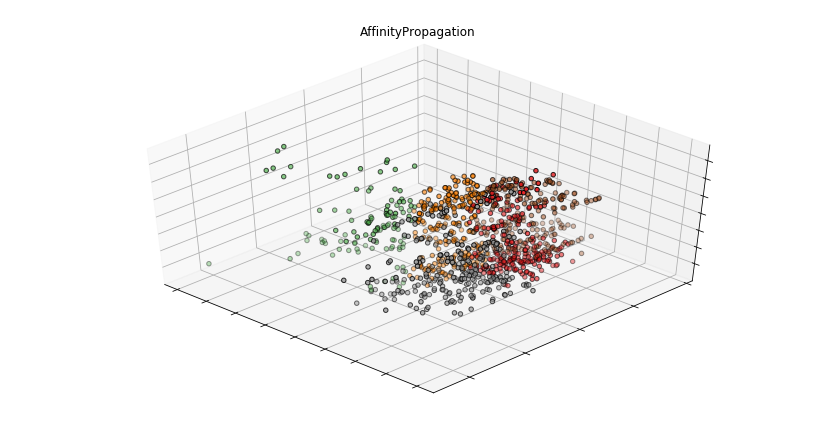

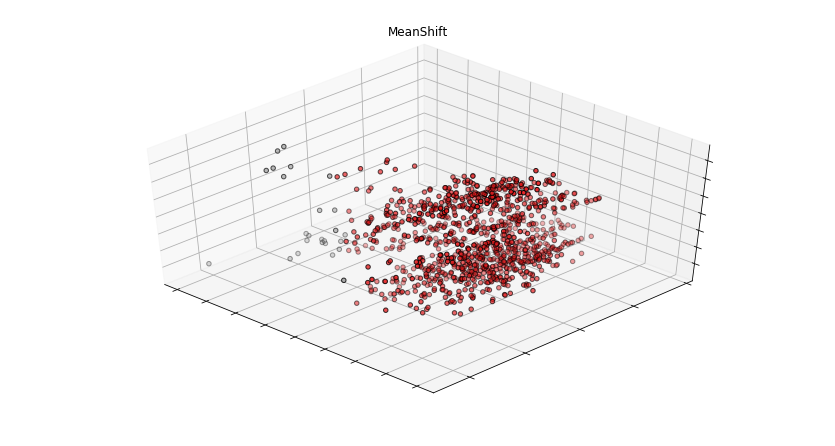

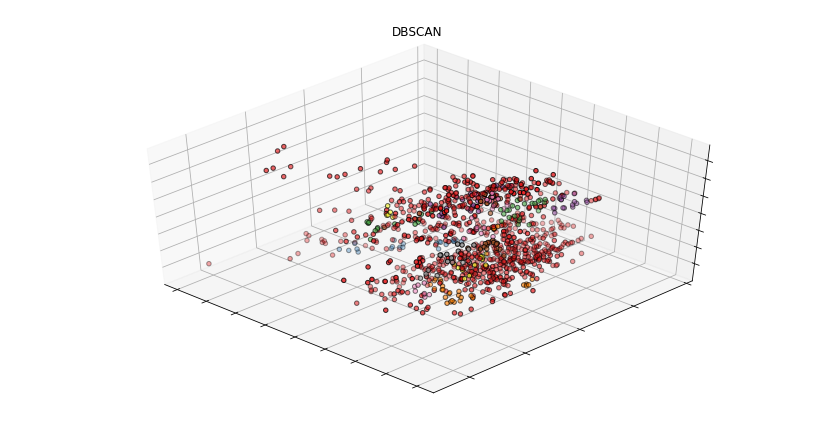

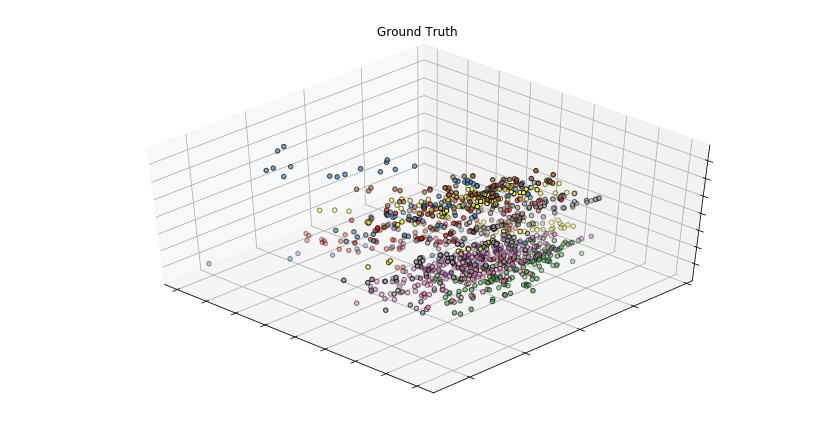

In [616]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import cluster

 # ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

estimators = [('AffinityPropagation', affinity_propagation),
              ('MeanShift', ms),
              ('DBSCAN', dbscan)
             ]

fignum = 1
titles = ['AffinityPropagation', 'MeanShift', 'DBSCAN']

X = X_PCA3

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    cmhot = plt.get_cmap("Set1")
    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels, edgecolor='k', label=target_names,  cmap=cmhot)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    # Result
    clusterResult.loc[name] = v_measure_score(ground_truth, labels), \
                        completeness_score(ground_truth, labels), homogeneity_score(ground_truth, labels), \
                        adjusted_rand_score(ground_truth, labels)
# Plot the ground truth
ax = fig.gca(projection='3d')
fig = plt.figure(fignum, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, range(0, len(np.unique(y)))).astype(np.float)
cmhot = plt.get_cmap("Set1")
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=ground_truth, edgecolor='k', label=y,  cmap=cmhot)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# Display Result
print("PCA", '(%d dim)'  % dimension )
display(clusterResult.transpose())
print('-'*50)

fig.show()

### 6-2 PCA 3-dim data clustering with given k
* KMeans
* SpectralClustering 
* Ward
* AgglomerativeClustering
* Birch

In [607]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, completeness_score, homogeneity_score
rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)


PCA (3 dim)


AffinityPropagation  MeanShift    DBSCAN    KMeans  \
v_measure                0.891241   0.837148  0.027584  0.260808   
completeness             0.891573   0.861992  0.320391  0.261970   
homogeneity              0.890908   0.813697  0.014413  0.259656   
rand_score               0.877595   0.750228 -0.000380  0.139174   

              SpectralClustering      Ward  AgglomerativeClustering     Birch  
v_measure               0.327376  0.284074                 0.054719  0.197289  
completeness            0.332261  0.286628                 0.338877  0.210463  
homogeneity             0.322633  0.281565                 0.029762  0.185667  
rand_score              0.175967  0.144708                 0.001660  0.086765

--------------------------------------------------


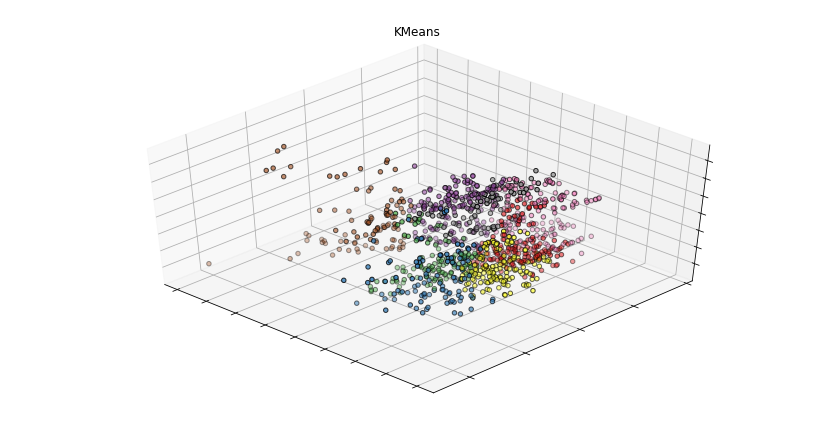

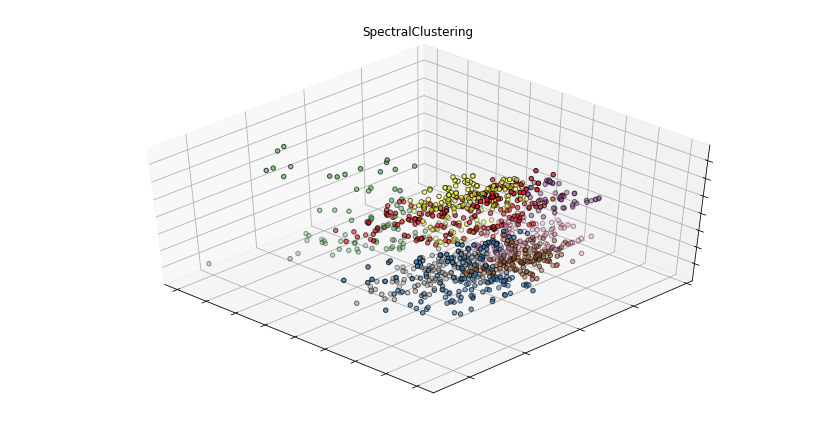

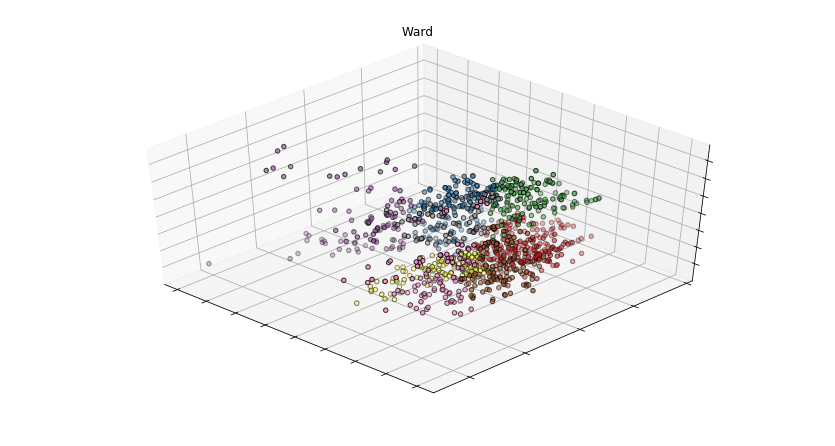

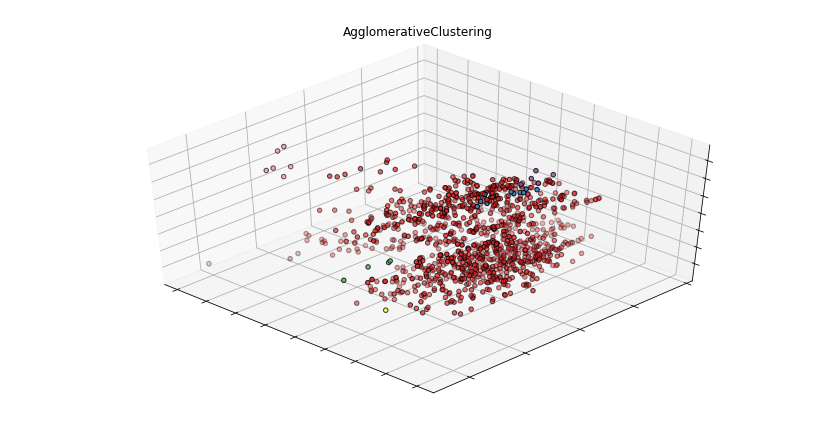

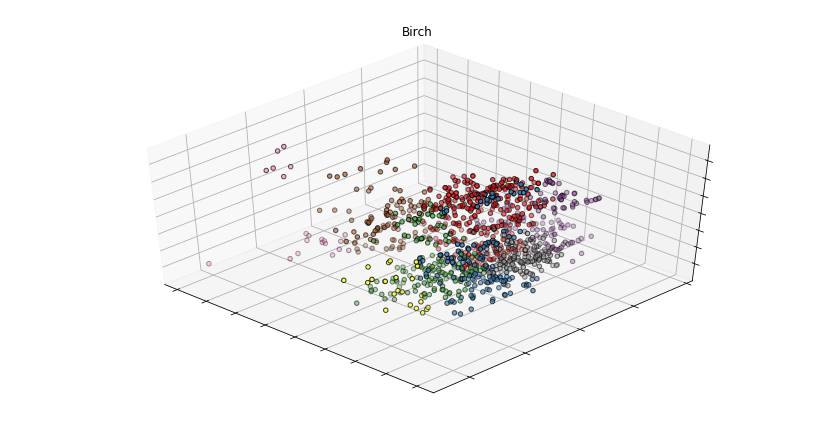

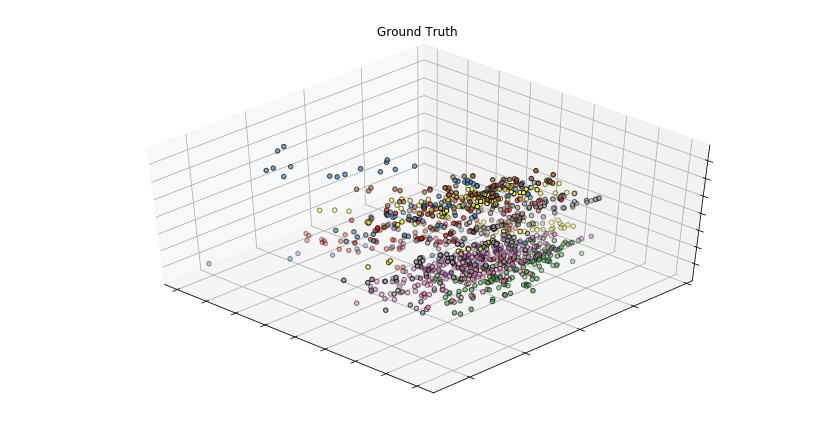

In [621]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import cluster


# ============
# Create cluster objects
# ============
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])


estimators = [('KMeans', KMeans(n_clusters=8)),
              ('SpectralClustering', spectral),
              ('Ward', ward),
              ('AgglomerativeClustering', average_linkage),
              ('Birch', cluster.Birch(n_clusters=8))
             ]

fignum = 1
titles = ['KMeans', 'SpectralClustering', 'Ward', 'AgglomerativeClustering', 'Birch']

X = X_PCA3

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    cmhot = plt.get_cmap("Set1")
    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels, edgecolor='k', label=target_names,  cmap=cmhot)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    # Result
    clusterResult.loc[name] = v_measure_score(ground_truth, labels), \
                        completeness_score(ground_truth, labels), homogeneity_score(ground_truth, labels), \
                        adjusted_rand_score(ground_truth, labels)
# Plot the ground truth
ax = fig.gca(projection='3d')
fig = plt.figure(fignum, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, range(0, len(np.unique(y)))).astype(np.float)
cmhot = plt.get_cmap("Set1")
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=ground_truth, edgecolor='k', label=y,  cmap=cmhot)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# Display Result
print("PCA", '(%d dim)'  % dimension )
display(clusterResult.transpose())
print('-'*50)

fig.show()

## 7. Clustering with 3-dim LDA data 
* 7-1 Clustering Method without k
* 7-2 Clustering Method with given k

### 7-1 LDA 3-dim data clustering without k
* AffinityPropagation
* MeanShift
* DBSCAN

In [602]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, completeness_score, homogeneity_score
rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)

LDA (3 dim)


AffinityPropagation  MeanShift    DBSCAN    KMeans  \
v_measure                0.891241   0.837148  0.027584  0.258332   
completeness             0.891573   0.861992  0.320391  0.259164   
homogeneity              0.890908   0.813697  0.014413  0.257505   
rand_score               0.877595   0.750228 -0.000380  0.138310   

              SpectralClustering      Ward  AgglomerativeClustering     Birch  
v_measure               0.327194  0.284074                 0.054719  0.197289  
completeness            0.332074  0.286628                 0.338877  0.210463  
homogeneity             0.322455  0.281565                 0.029762  0.185667  
rand_score              0.175901  0.144708                 0.001660  0.086765

--------------------------------------------------


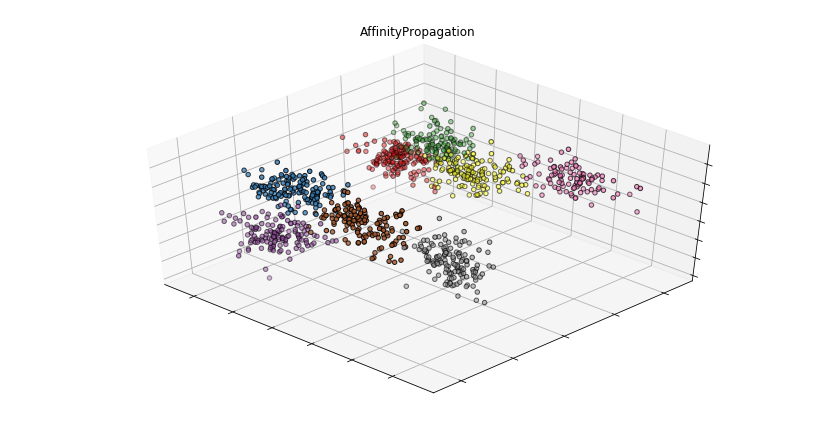

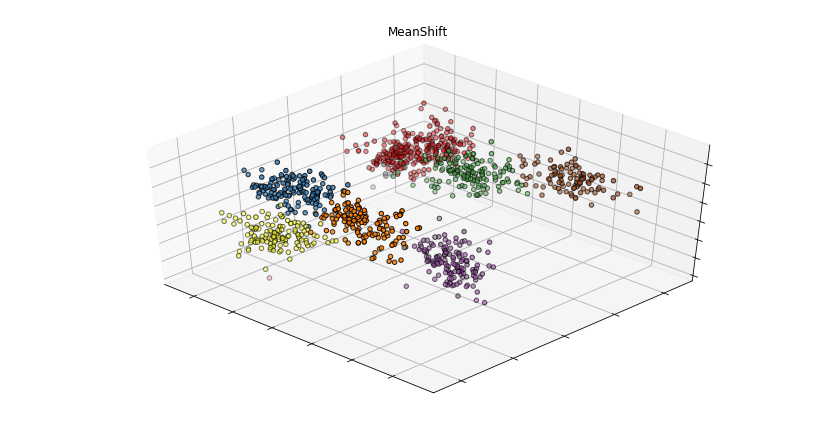

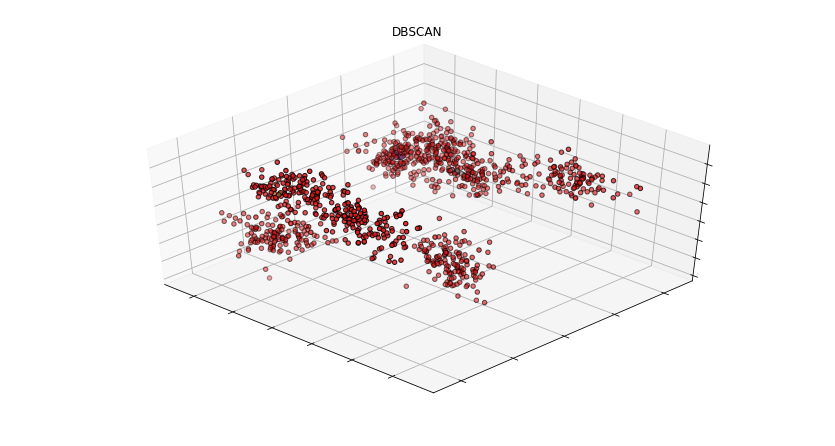

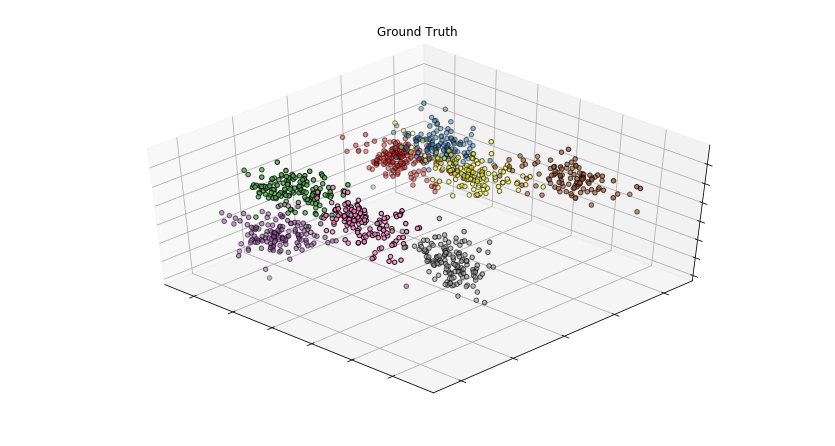

In [620]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import cluster

 # ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
dbscan = cluster.DBSCAN(eps=params['eps'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

estimators = [('AffinityPropagation', affinity_propagation),
              ('MeanShift', ms),
              ('DBSCAN', dbscan)
             ]

fignum = 1
titles = ['AffinityPropagation', 'MeanShift', 'DBSCAN']

X = X_LDA3

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    cmhot = plt.get_cmap("Set1")
    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels, edgecolor='k', label=target_names,  cmap=cmhot)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    # Result
    clusterResult.loc[name] = v_measure_score(ground_truth, labels), \
                        completeness_score(ground_truth, labels), homogeneity_score(ground_truth, labels), \
                        adjusted_rand_score(ground_truth, labels)
# Plot the ground truth
ax = fig.gca(projection='3d')
fig = plt.figure(fignum, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, range(0, len(np.unique(y)))).astype(np.float)
cmhot = plt.get_cmap("Set1")
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=ground_truth, edgecolor='k', label=y,  cmap=cmhot)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# Display Result
print("LDA", '(%d dim)'  % dimension )
display(clusterResult.transpose())
print('-'*50)

fig.show()

> 值得注意的是，降成三維後， <br>
* AffinityPropagation	和 MeanShift 都明顯比二維 LDA 變好。<br>
* AffinityPropagation 可分出 8 群，但 MeanShift 只分出 7 群。
* DBSCAN 還是一樣慘。

### 7-2 LDA 3-dim data clustering with given k
* KMeans
* SpectralClustering 
* Ward
* AgglomerativeClustering
* Birch

In [604]:
from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score, completeness_score, homogeneity_score
rstCol = ['v_measure', 'completeness', 'homogeneity', 'rand_score']
clusterResult = pd.DataFrame(columns=rstCol)

/home/ailurus/.local/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


LDA (3 dim)


KMeans  SpectralClustering      Ward  AgglomerativeClustering  \
v_measure     0.895034            0.884505  0.684004                 0.625664   
completeness  0.895300            0.885010  0.743938                 0.864310   
homogeneity   0.894768            0.884001  0.633006                 0.490289   
rand_score    0.885957            0.869805  0.526530                 0.349792   

                 Birch  
v_measure     0.854395  
completeness  0.855602  
homogeneity   0.853190  
rand_score    0.797842

--------------------------------------------------


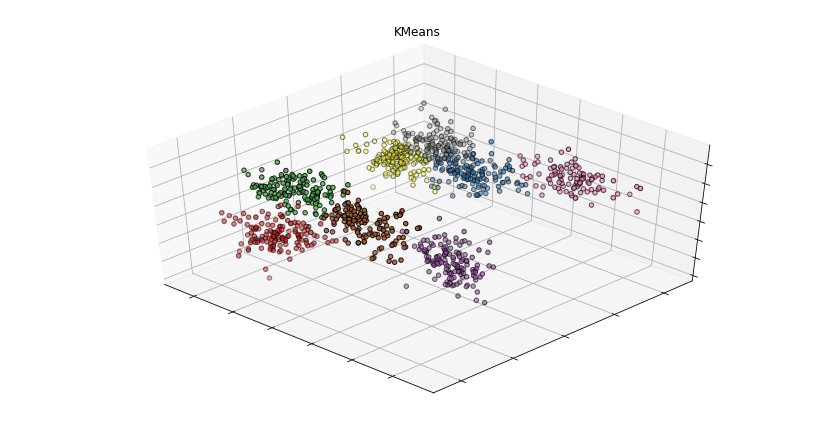

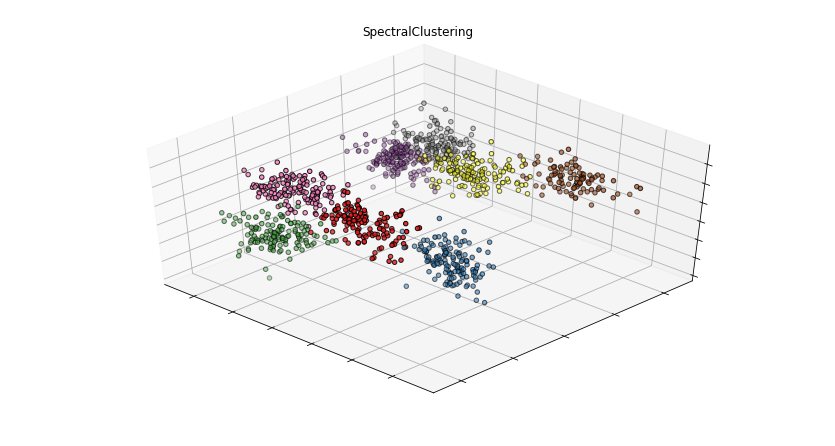

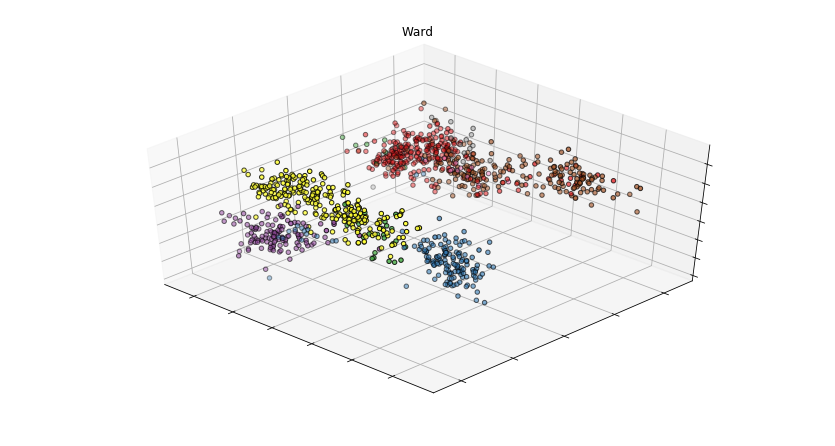

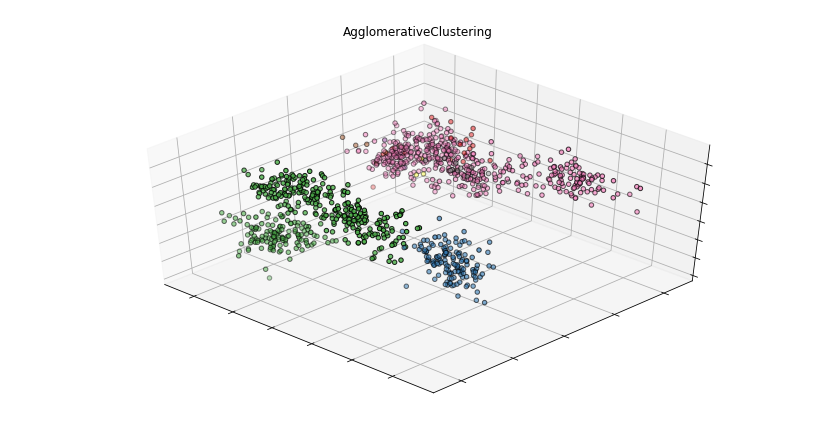

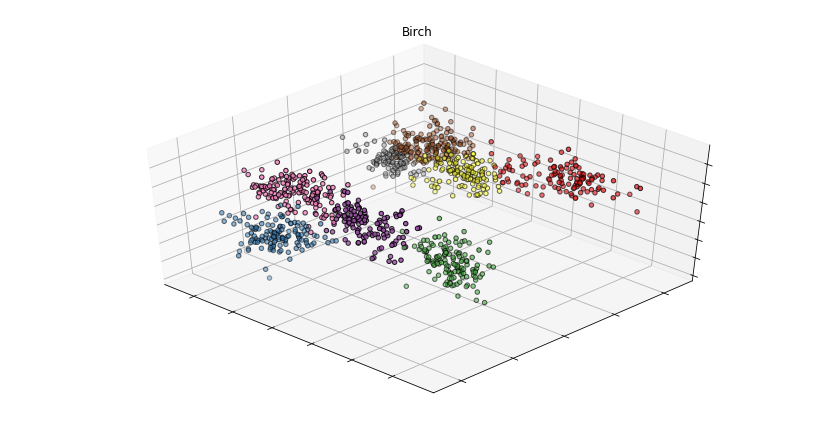

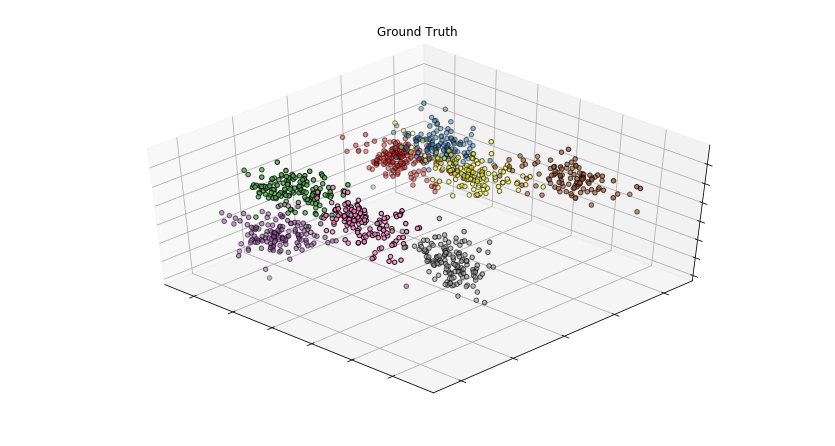

In [605]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import cluster


# ============
# Create cluster objects
# ============
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])


estimators = [('KMeans', KMeans(n_clusters=8)),
              ('SpectralClustering', spectral),
              ('Ward', ward),
              ('AgglomerativeClustering', average_linkage),
              ('Birch', cluster.Birch(n_clusters=8))
             ]

fignum = 1
titles = ['KMeans', 'SpectralClustering', 'Ward', 'AgglomerativeClustering', 'Birch']

X = X_LDA3

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    cmhot = plt.get_cmap("Set1")
    ax.scatter(X[:, 1], X[:, 0], X[:, 2],
               c=labels, edgecolor='k', label=target_names,  cmap=cmhot)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
    # Result
    clusterResult.loc[name] = v_measure_score(ground_truth, labels), \
                        completeness_score(ground_truth, labels), homogeneity_score(ground_truth, labels), \
                        adjusted_rand_score(ground_truth, labels)
# Plot the ground truth
ax = fig.gca(projection='3d')
fig = plt.figure(fignum, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, range(0, len(np.unique(y)))).astype(np.float)
cmhot = plt.get_cmap("Set1")
ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=ground_truth, edgecolor='k', label=y,  cmap=cmhot)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

# Display Result
print("LDA", '(%d dim)'  % dimension )
display(clusterResult.transpose())
print('-'*50)

fig.show()